In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

1 loop, best of 3: 1.55 s per loop


In [5]:
%timeit b = A.dot(x)

1 loop, best of 3: 325 ms per loop


One can also make outer products and other operations with NumPy arrays.

In [6]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [7]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


## Solving a linear system

In [8]:
n = 20
A = np.random.random((20, 20))
x_actual = np.random.random(20)

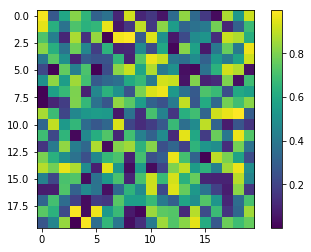

In [9]:
plt.imshow(A)
plt.colorbar()

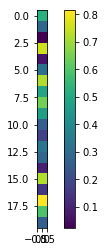

In [10]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [11]:
b = A.dot(x_actual)

In [12]:
x = linalg.solve(A, b).reshape(n)

In [13]:
print(x)

[ 0.5281278   0.29105142  0.02360973  0.75784742  0.06763472  0.31688189
  0.72352822  0.48704231  0.64508001  0.47241627  0.25973289  0.18078729
  0.33286154  0.28989799  0.09357357  0.72388004  0.15313225  0.81433598
  0.59297893  0.259583  ]


In [14]:
print(x - x_actual)

[ -2.55351296e-15   2.33146835e-15  -9.88792381e-16   2.22044605e-16
   2.05391260e-15  -2.83106871e-15   5.44009282e-15   8.88178420e-16
   1.99840144e-15  -7.21644966e-16   2.55351296e-15  -3.27515792e-15
  -1.27675648e-15   2.22044605e-16   2.01227923e-15  -3.33066907e-15
   1.94289029e-16  -1.22124533e-15  -1.11022302e-15  -2.22044605e-16]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [15]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[  9.76996262e-15   1.15463195e-14  -2.28705943e-14  -5.44009282e-15
   1.94289029e-14   2.09832152e-14   0.00000000e+00   1.28785871e-14
  -7.10542736e-15   9.65894031e-15   5.55111512e-16  -1.15463195e-14
  -2.77555756e-15  -1.11022302e-15   3.44169138e-15  -4.55191440e-15
  -8.21565038e-15  -9.99200722e-16  -6.21724894e-15   2.22044605e-16]


## NumPy Application of SVD

Let us explore how a matrix works as a linear mapping, and how SVD tells us about that linear mapping.

In [ ]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = 0.5
A[1, 0] = 0.5  
A[1, 1] = 1
print(A)

Let's take two basis vectors for the space of $\vec{x}$:

In [ ]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [ ]:
plt.arrow(origin[0], origin[1], x0[0], x0[1], color='blue')
plt.arrow(origin[0], origin[1], x1[0], x1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))


In [ ]:
b0 = A.dot(x0)
b1 = A.dot(x1)

In [ ]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))

In [ ]:
(U, w, VT) = linalg.svd(A)

In [ ]:
print(w)

In [ ]:
print(U)

In [ ]:
print(VT)

In [ ]:
Ainv = VT.transpose().dot(np.diag(1. / w)).dot(U.transpose())
print(Ainv.dot(b0))
print(Ainv.dot(b1))

## A simple singular matrix

In [ ]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

We can see clearly the range of $A$ by throwing a bunch of random points at it.

In [ ]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

In [ ]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

In [ ]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

It is sufficient, in fact, to look just at what happens to the basis vectors (all other results are just a linear combination of those).

In [ ]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [ ]:
b0 = A.dot(x0)
b1 = A.dot(x1)

In [ ]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))

SVD gives us a diagnosis; for much higher dimensional problems this is very useful.

In [ ]:
(U, w, VT) = np.linalg.svd(A)

Note that this results in a zero component of $w$:

In [ ]:
print(w)

The columns of ${\bf U}$ corresponding to non-zero $w_j$ give the range of ${\bf A}$:

In [ ]:
print(U[:, 0])

And the columns of ${\bf V}$ corresponding to zero $w_j$ give the null space: 

In [ ]:
print(VT.transpose()[:, 1])

We can see how SVD works on some simple examples. If $\vec{b} = (-0.5, 0.6)$, we should expect to get an $\vec{x}$ that gets us as close as we can get to this within the range of ${\bf A}$. It will not get us exactly there however.

In [ ]:
winv = np.zeros(len(w))
indx = np.where(w > 1.e-15)[0]
winv[indx] = 1. / w[indx]
print(winv)

In [ ]:
Ainv = VT.transpose().dot(np.diag(winv)).dot(U.transpose()) 

In [ ]:
b = np.array([-0.5, 0.6])
x = Ainv.dot(b)

In [ ]:
print(x)

${\bf A}\cdot\vec{x}$ yields some approximation of $\vec{b}$, that lies in the range:

In [ ]:
bapprox = print(A.dot(x))

If $\vec{b}$ is in the range, e.g. is $(1, -1)$, it can be recovered exactly: 

In [ ]:
b = np.array([1., -1])
x = Ainv.dot(b)

In [ ]:
print(x)

In [ ]:
bapprox = print(A.dot(x))

Note that the null space allows me to add any vector with $x_0 = x_1$ to the above solution. The given $\vec{x}$ is the choice which minimizes its norm.